In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as py
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf

In [3]:
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.16.1
Keras version: 3.3.3


In [5]:
#Read and explore the data
Read and explore the datadf=pd.read_json("C:/Users/FARHAN/Downloads/Sarcasm_Headlines_Dataset.json",lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [9]:
df.nunique()

article_link    26708
headline        26602
is_sarcastic        2
dtype: int64

In [13]:
df.describe()

,is_sarcastic
count,26709.000000
mean,0.438953
std,0.496269
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [16]:
df.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [19]:
df.shape

(26709, 3)

In [21]:
df.duplicated().sum()

1

In [24]:
df.drop_duplicates().sum()

article_link    https://www.huffingtonpost.com/entry/versace-b...
headline        former versace store clerk sues over secret 'b...
is_sarcastic                                                11724
dtype: object

In [26]:
df.duplicated().sum()

1

In [28]:
#Retain relevant columns
data=df[['headline','is_sarcastic']]
data.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


<Axes: >

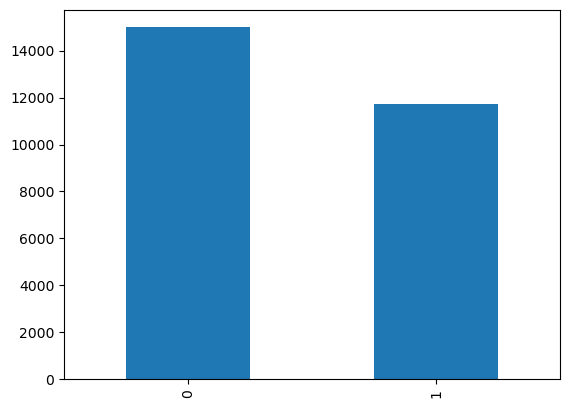

In [30]:
data['is_sarcastic'].value_counts().plot(kind='bar')

In [32]:
data['len']= data['headline'].apply(lambda x: len(x.split(" ")))

In [33]:
data['len'].describe()

count    26709.000000
mean         9.847842
std          3.172099
min          2.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         39.000000
Name: len, dtype: float64

In [41]:
max_length = data['len'].max()
embedding_dim = 50
max_words = 1000
print(max_length )

39


In [76]:
#Get Indices for Words 

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['headline'])

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(data['headline'])

# Determine the maximum length of the sequences
max_length = max(len(seq) for seq in sequences)

# Pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# Convert padded sequences to a NumPy array
padded_sequences = np.array(padded_sequences)

# Add the padded sequences to the DataFrame
data['headline_padded'] = list(padded_sequences)

print(data.head())

                                            headline  is_sarcastic  len  \
0  former versace store clerk sues over secret 'b...             0   12   
1  the 'roseanne' revival catches up to our thorn...             0   14   
2  mom starting to fear son's web series closest ...             1   14   
3  boehner just wants wife to listen, not come up...             1   13   
4  j.k. rowling wishes snape happy birthday in th...             0   11   

                                     headline_padded  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  


In [83]:
# Create Features and Labels
X = np.array(data['headline_padded'].tolist())
y = np.array(data['is_sarcastic'])


In [117]:
from sklearn.preprocessing import OneHotEncoder

# Assuming your target values are in y_train and y_val
encoder = OneHotEncoder(sparse=False)

# Reshape y_train and y_val if necessary (e.g., if they are 1D arrays)
y_train_reshaped = y.reshape(-1, 1)


# Fit and transform the encoder on training labels
y_train_encoded = encoder.fit_transform(y_train_reshaped)

y_train_encoded


array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [116]:
from tensorflow.keras.utils import to_categorical
y_en=to_categorical(y,num_classes=2)
y_en

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [84]:
# Get Vocabulary Size  
vocab_size = min(len(word_index) + 1, max_words)
print(f"Vocabulary size: {vocab_size}")


Vocabulary size: 1000


In [87]:
#Create a Weight Matrix Using GloVe Embeddings 


# Load GloVe embeddings
glove_path = 'C:/Users/FARHAN/Downloads/glove.6B/glove.6B.50d.txt'
embeddings_index = {}
with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i >= max_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [145]:
# Define and compile a Bidirectional LSTM model


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, Flatten

# Model architecture
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_shape=(max_length,), trainable=False))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Two output neurons for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


# Target formatting
from tensorflow.keras.utils import to_categorical

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_52 (Embedding)             │ (None, 25, 50)              │          50,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_58 (Bidirectional)     │ (None, 25, 128)             │          58,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_33 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_214 (Dense)                    │ (None, 512)                 │       1,638,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_58 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_215 (Dense)                    │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,748,818 (6.67 MB)

 Trainable params: 1,698,818 (6.48 MB)

 Non-trainable params: 50,000 (195.31 KB)

None


In [147]:
#Fit the model and check the validation accuracy

from sklearn.model_selection import train_test_split

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y_train_encoded, test_size=0.2, random_state=42)

# Train the model
result = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=2)

# Check validation accuracy
val_accuracy = history.history['val_accuracy'][-1]
print(f"Validation Accuracy: {val_accuracy:.2f}")


Epoch 1/10
668/668 - 27s - 40ms/step - accuracy: 0.9257 - loss: 0.1702 - val_accuracy: 0.8012 - val_loss: 0.5645
Epoch 2/10
668/668 - 27s - 41ms/step - accuracy: 0.9342 - loss: 0.1540 - val_accuracy: 0.8068 - val_loss: 0.5695
Epoch 3/10
668/668 - 27s - 41ms/step - accuracy: 0.9427 - loss: 0.1339 - val_accuracy: 0.8064 - val_loss: 0.6343
Epoch 4/10
668/668 - 28s - 41ms/step - accuracy: 0.9471 - loss: 0.1240 - val_accuracy: 0.8042 - val_loss: 0.6897
Epoch 5/10
668/668 - 28s - 43ms/step - accuracy: 0.9519 - loss: 0.1150 - val_accuracy: 0.7950 - val_loss: 0.6993
Epoch 6/10
668/668 - 29s - 44ms/step - accuracy: 0.9552 - loss: 0.1073 - val_accuracy: 0.8016 - val_loss: 0.7679
Epoch 7/10
668/668 - 27s - 41ms/step - accuracy: 0.9595 - loss: 0.0953 - val_accuracy: 0.7952 - val_loss: 0.8738
Epoch 8/10
668/668 - 27s - 41ms/step - accuracy: 0.9605 - loss: 0.0920 - val_accuracy: 0.7958 - val_loss: 0.8655
Epoch 9/10
668/668 - 28s - 42ms/step - accuracy: 0.9646 - loss: 0.0844 - val_accuracy: 0.7888 - 

Text(0.5, 1.0, 'Training and validation loss')

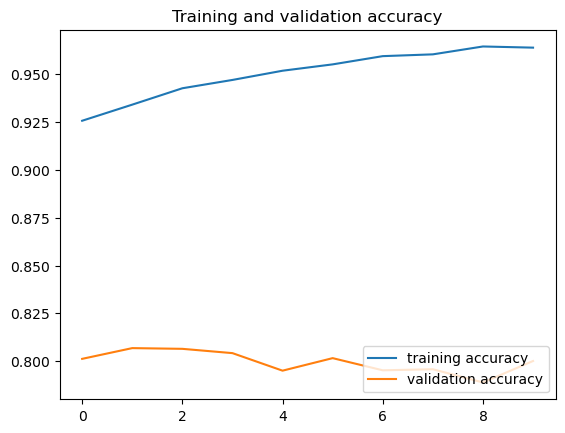

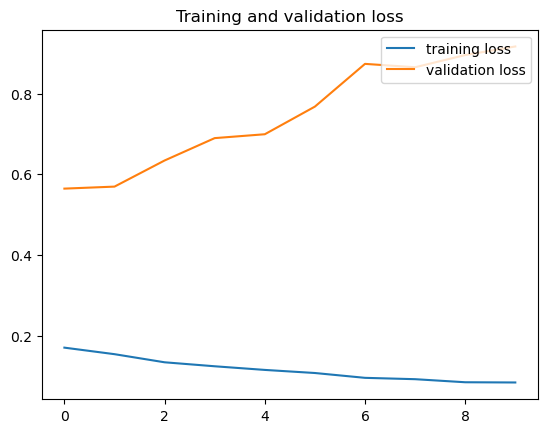

In [148]:
accuracy = result.history['accuracy']
val_accuracy = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

py.plot(epochs, accuracy, label = 'training accuracy' )
py.plot(epochs, val_accuracy, label = 'validation accuracy')
py.title('Training and validation accuracy')
py.legend(loc = 'lower right')
py.figure()

py.plot(epochs, loss, label = 'training loss' )
py.plot(epochs, val_loss, label = 'validation loss')
py.legend(loc = 'upper right')
py.title('Training and validation loss')